## kx:0.54

In [1]:
%run /u/cmor/jupyter/HP_project/main.ipynb
def convergence_fitter(plot='real'):

    global scan, t0, tf # Get all this stuff needed
    
    all_a = []
    all_b = []
    all_c = []
    all_d = []
    all_e = []
    all_m = []
    all_g = []
    all_k = []
    all_x = []
    all_r = []
    
    ke = len(scan)
    
    if plot != None:
        plt.figure()
        plt.xlabel('Time units $(a/\\rho_{ti})$')
        plt.ylabel('Zonal Potential $(\\frac{\langle\phi_{zf}(t)\\rangle}{\langle\phi_{zf}(0)\\rangle})$')
        plt.axhline(y=0, color='black', linewidth=2, linestyle='dashed')  # Have a reference of zero
            
    ## Guesses:

    ## Nice low-k LHD:
    a = 0.01211829
    b = 0.74438260
    c = 0.05379711
    d = 0.31133248
    e = 0.03005418
    g = 2.60337992
    k = 0.00891163
    m = 0.30807454

    # ## Realistic W7-X
    # a = -0.11281396
    # b = 2.17348488
    # c = 7.0783e-09
    # d = -1.41262475
    # e = 0.00928013
    # g = 1.80730195
    # k = 8.9030e-07
    # m = 0.53971275

    for n in range(0, ke):

        y, t = data_grab(t0, tf, n)

        gmodel = lmfit.Model(edi_2)
        if n == 0:
#             pars = gmodel.make_params(a=0.009, b=-0.63, c=0.002, d=-28.48, e=0.003, m=0.344, g=2.737, k=0.006)  # W7-X initial guess
#             pars = gmodel.make_params(a=0.0022,
#                                       b=0.833,
#                                       c=-0.0534,
#                                       d=-0.392,
#                                       e=0.037,
#                                       g=3.36,
#                                       k=9.59e-4,
#                                       m=0.293) # LHD initial guess
            pars = Parameters()
            pars.add('a', value=a)  # Residual
            pars.add('b', value=b)
            pars.add('c', value=c)
            pars.add('d', value=d)
            pars.add('e', value=e)  # decay
            pars.add('g', value=g)
            pars.add('k', value=k)
            pars.add('m', value=m)
        else:
            pars = Parameters()
            pars.add('a', value=all_a[-1])  # , min=0.0005, max=0.035)  # Residual
            pars.add('b', value=all_b[-1])
            pars.add('c', value=all_c[-1])
            pars.add('d', value=all_d[-1])
            pars.add('e', value=all_e[-1])  # decay
            pars.add('g', value=all_g[-1])
            pars.add('k', value=all_k[-1])
            pars.add('m', value=all_m[-1])

        result = gmodel.fit(y, pars, t=t, nan_policy='propagate')

        all_a = np.append(all_a, result.best_values.get("a"))
        all_b = np.append(all_b, result.best_values.get("b"))
        all_c = np.append(all_c, result.best_values.get("c"))
        all_d = np.append(all_d, result.best_values.get("d"))
        all_e = np.append(all_e, result.best_values.get("e"))
        all_m = np.append(all_m, result.best_values.get("m"))
        all_g = np.append(all_g, result.best_values.get("g"))
        all_k = np.append(all_k, result.best_values.get("k"))
        all_x = np.append(all_x, result.chisqr)
        all_r = np.append(all_r, 1 - result.residual.var() / np.var(y))

        if plot != None:
#             plt.plot(t, result.init_fit, label=r"Initial guess")
#             plt.plot(t, result.best_fit, 'r--', linewidth=1, label=r"Best fit", alpha=0.5)
            plt.plot(t, y, label='{0}'.format(scan[n]))
    if plot != None:
#         plt.yscale('log')
        plt.legend()
        plt.show()

    return all_x, all_r, all_a, all_e

/raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/nv0_surface_k=0.03
[[Model]]
    Model(edi_2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2002
    # data points      = 34247
    # variables        = 8
    chi-square         = 25.1967310
    reduced chi-square = 7.3591e-04
    Akaike info crit   = -247063.776
    Bayesian info crit = -246996.245
[[Variables]]
    a:  0.00362666 +/- 1.4947e-04 (4.12%) (init = 0.01211829)
    b:  0.31017476 +/- 0.00107248 (0.35%) (init = 0.7443826)
    c:  0.00300969 +/- 5.8523e-07 (0.02%) (init = 0.05379711)
    d: -0.19717473 +/- 0.00357213 (1.81%) (init = 0.3113325)
    e:  8.0106e-04 +/- 3.6164e-06 (0.45%) (init = 0.03005418)
    g:  3.01129861 +/- 0.05344598 (1.77%) (init = 2.60338)
    k:  1.2502e-05 +/- 2.6647e-06 (21.31%) (init = 0.00891163)
    m:  0.43391781 +/- 0.00293929 (0.68%) (init = 0.3080745)


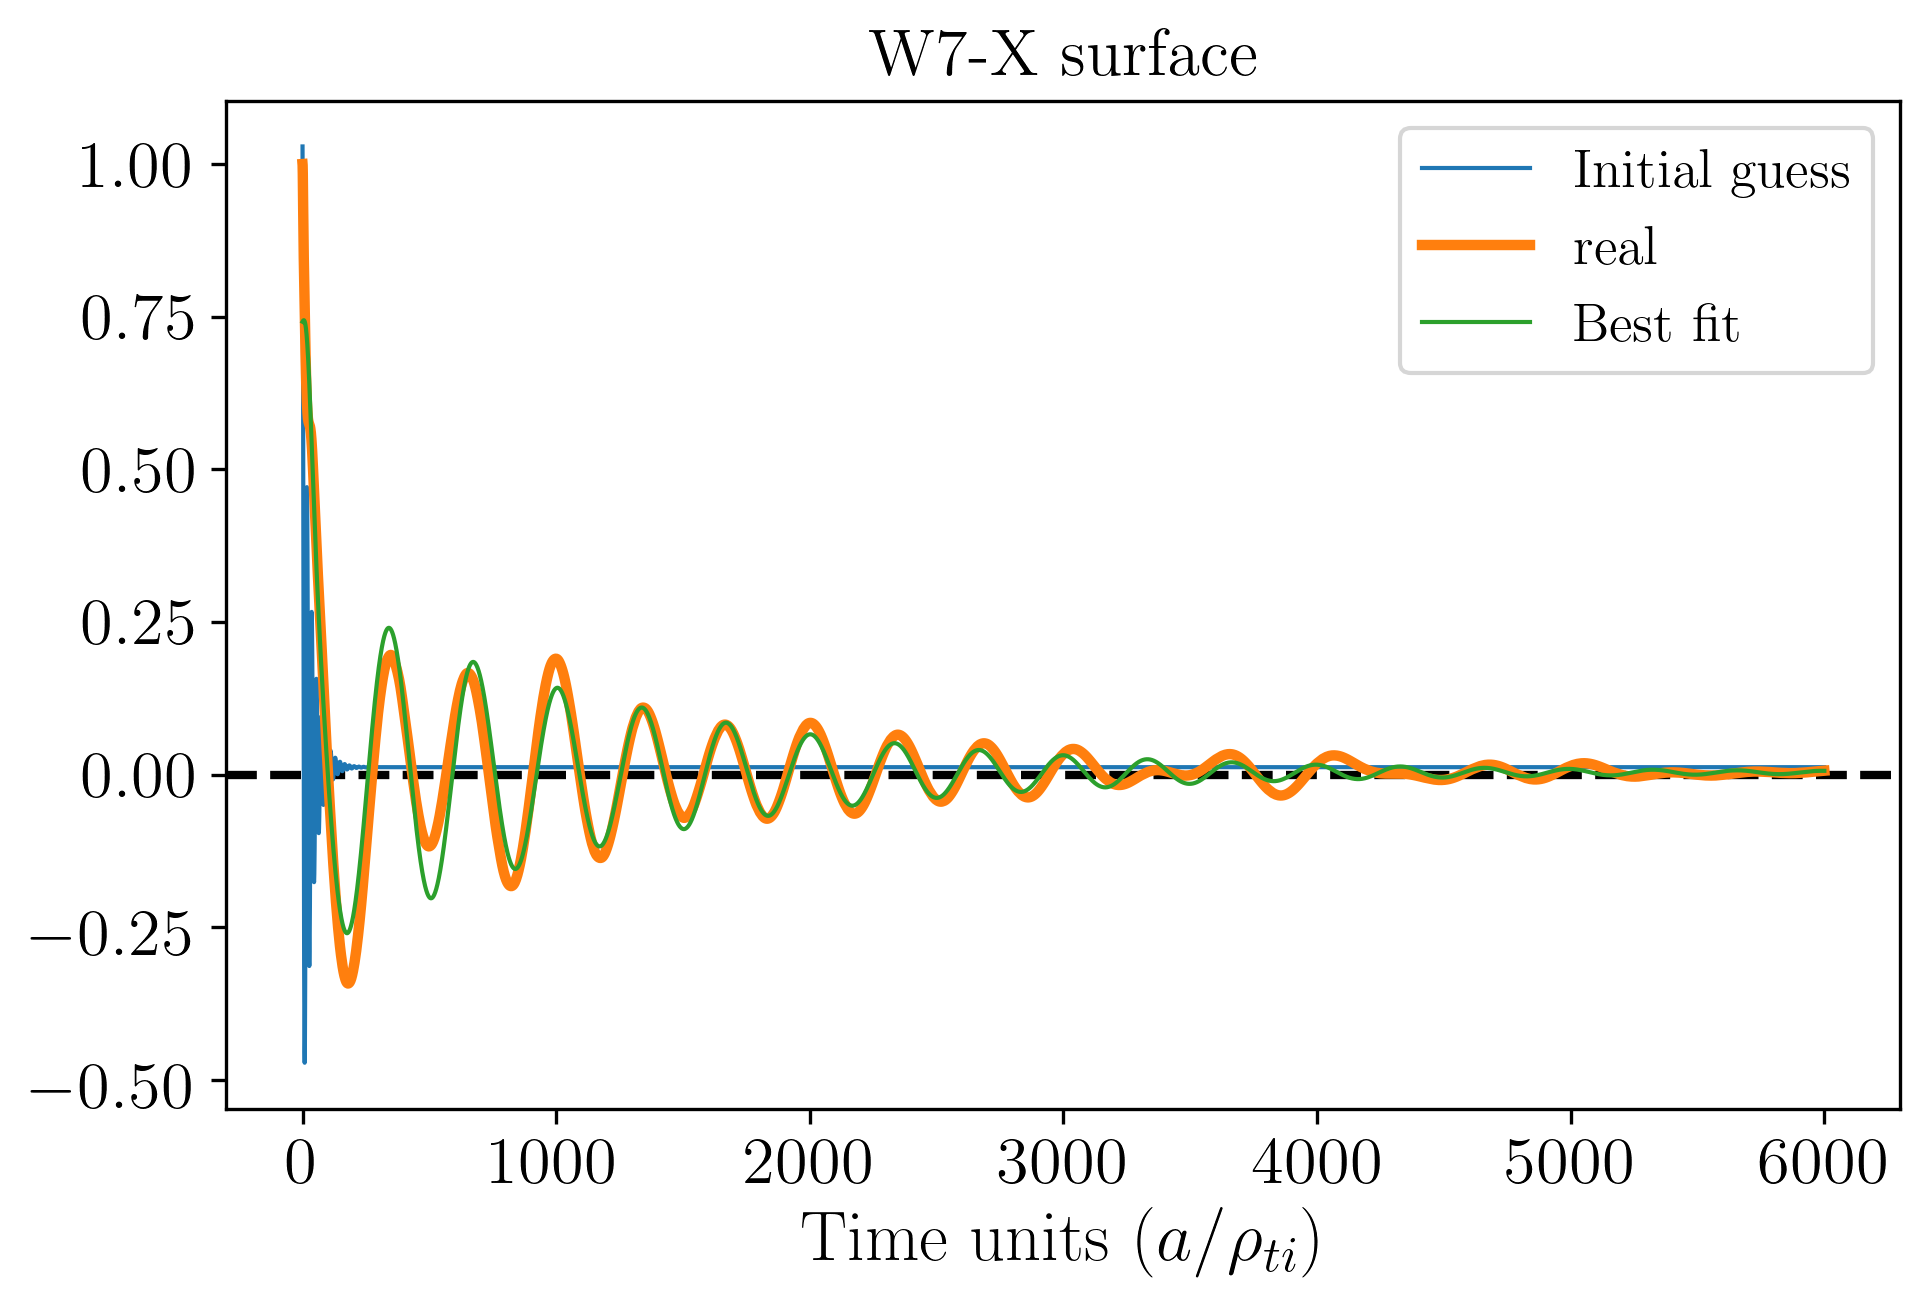

In [3]:
%cd /u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/nv0_surface_k=0.03
# plt.rcParams.update({
#     "text.usetex": False,
#     "font.family": "serif",
#     "font.serif": ["Palatino"],
# })
label   = "surface"
log = False
t0 = 0
tf = 6000
    
# Start plotting details, label and title
plt.figure()
plt.xlabel('Time units $(a/\\rho_{ti})$')
plt.axhline(y=0, color='black', linewidth=2, linestyle='dashed')  # Have a reference of zero

# End plotting details
flnm = "timetraceions_0006.dat"
gam = pylab.loadtxt("{0}".format(flnm))

a = np.divide(gam[:, 1], gam[0, 1], out=np.zeros_like(gam[:, 1]), where=gam[0, 1] != 0)

t = gam[:, 0]  # Time

# Crop the time trace to the required values

if t0 != None:
    ini = (np.abs(t - t0)).argmin()
else:
    ini = (np.abs(t - t[0])).argmin()
if tf != None:
    fin = (np.abs(t - tf)).argmin()
else:
    fin = (np.abs(t - t[-1])).argmin()

y = a[ini:fin]
t = t[ini:fin]


## Nice low-k LHD:
a = 0.01211829
b = 0.74438260
c = 0.05379711
d = 0.31133248
e = 0.03005418
g = 2.60337992
k = 0.00891163
m = 0.30807454

# ## Realistic W7-X
# a = -0.11281396
# b = 2.17348488
# c = 7.0783e-09
# d = -1.41262475
# e = 0.00928013
# g = 1.80730195
# k = 8.9030e-07
# m = 0.53971275

gmodel = lmfit.Model(edi_2)

pars = Parameters()
pars.add('a', value=a)  # Residual
pars.add('b', value=b)
pars.add('c', value=c)
pars.add('d', value=d)
pars.add('e', value=e)  # decay
pars.add('g', value=g)
pars.add('k', value=k)
pars.add('m', value=m)


result = gmodel.fit(y, pars, t=t, nan_policy='propagate')

print(result.fit_report(show_correl=False))

plt.plot(t, result.init_fit, label=r"Initial guess", linewidth=1)
plt.plot(t, y, label='real')
plt.plot(t, result.best_fit, linewidth=1, label=r"Best fit")
plt.title(r"W7-X surface")
# plt.ylim(ymax=1)
# plt.xlim(xmin=0)
plt.legend()

# plt.text(300, 0.1, '{0}'.format(result.fit_report(show_correl=False)), fontsize=6.5)
plt.show()

r2 = 1 - result.residual.var() / np.var(y)

In [ ]:
%cd /u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/nv0_surface_k=0.03
label   = "w7x-surface"
# End plotting details

gam = pylab.loadtxt("timetraceions_0006.dat")

E = np.divide(gam[:, 1], gam[0, 1], out=np.zeros_like(gam[:, 1]), where=gam[0, 1] != 0)

t = gam[:, 0]  # Time

# Crop the time trace to the required values

## Nice low-k LHD:
a = 0.01211829
b = 0.74438260
c = 0.05379711
d = 0.31133248
e = 0.03005418
g = 2.60337992
k = 0.00891163
m = 0.30807454

# ## Realistic W7-X
# a = -0.11281396
# b = 2.17348488
# c = 7.0783e-09
# d = -1.41262475
# e = 0.00928013
# g = 1.80730195
# k = 8.9030e-07
# m = 0.53971275

r2 = []
res = []
tstep = []

for kekke in range(20, len(t), 100):

    y = E[:kekke]
    p = t[:kekke]

    gmodel = lmfit.Model(edi_2)

    pars = Parameters()
    pars.add('a', value=a)  # Residual
    pars.add('b', value=b)
    pars.add('c', value=c)
    pars.add('d', value=d)
    pars.add('e', value=e)  # decay
    pars.add('g', value=g)
    pars.add('k', value=k)
    pars.add('m', value=m)
    result = gmodel.fit(y, pars, t=p, nan_policy='propagate')
    r2 = np.append(r2, 1 - result.residual.var() / np.var(y))
    res = np.append(res, result.best_values.get("a"))
    tstep = np.append(tstep, p[-1])

/raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/nv0_surface_k=0.03


/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


In [ ]:
tstep_1 = tstep
r2_1 = r2
res_1 = res
plt.plot(tstep_1, r2_1, label=r"$R^{2}$")
plt.plot(tstep_1, res_1 + 1, label=r"Residual +1")
plt.ylim(ymax=1.1, ymin=0.4)
plt.xlim(xmin=500)
plt.title(r"W7-X surface timetraceions\_0006")
plt.xlabel(r"Upper limit of domain (time units $(a/\rho_{ti})$)")
# plt.ylabel(r"$R^{2}$")
plt.legend()
plt.show()

In [ ]:
%cd /u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/nv0_surface_k=0.54
t0 = 0
tf = 6000
scan = 21, 42, 84, 126, 168, 210, 252, 294, 336  # nv0
all_x, all_r, all_a, all_e = convergence_fitter(plot='kakakak')
scan_v = scan
res_v = all_a

/raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/nv0_surface_k=0.03


/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


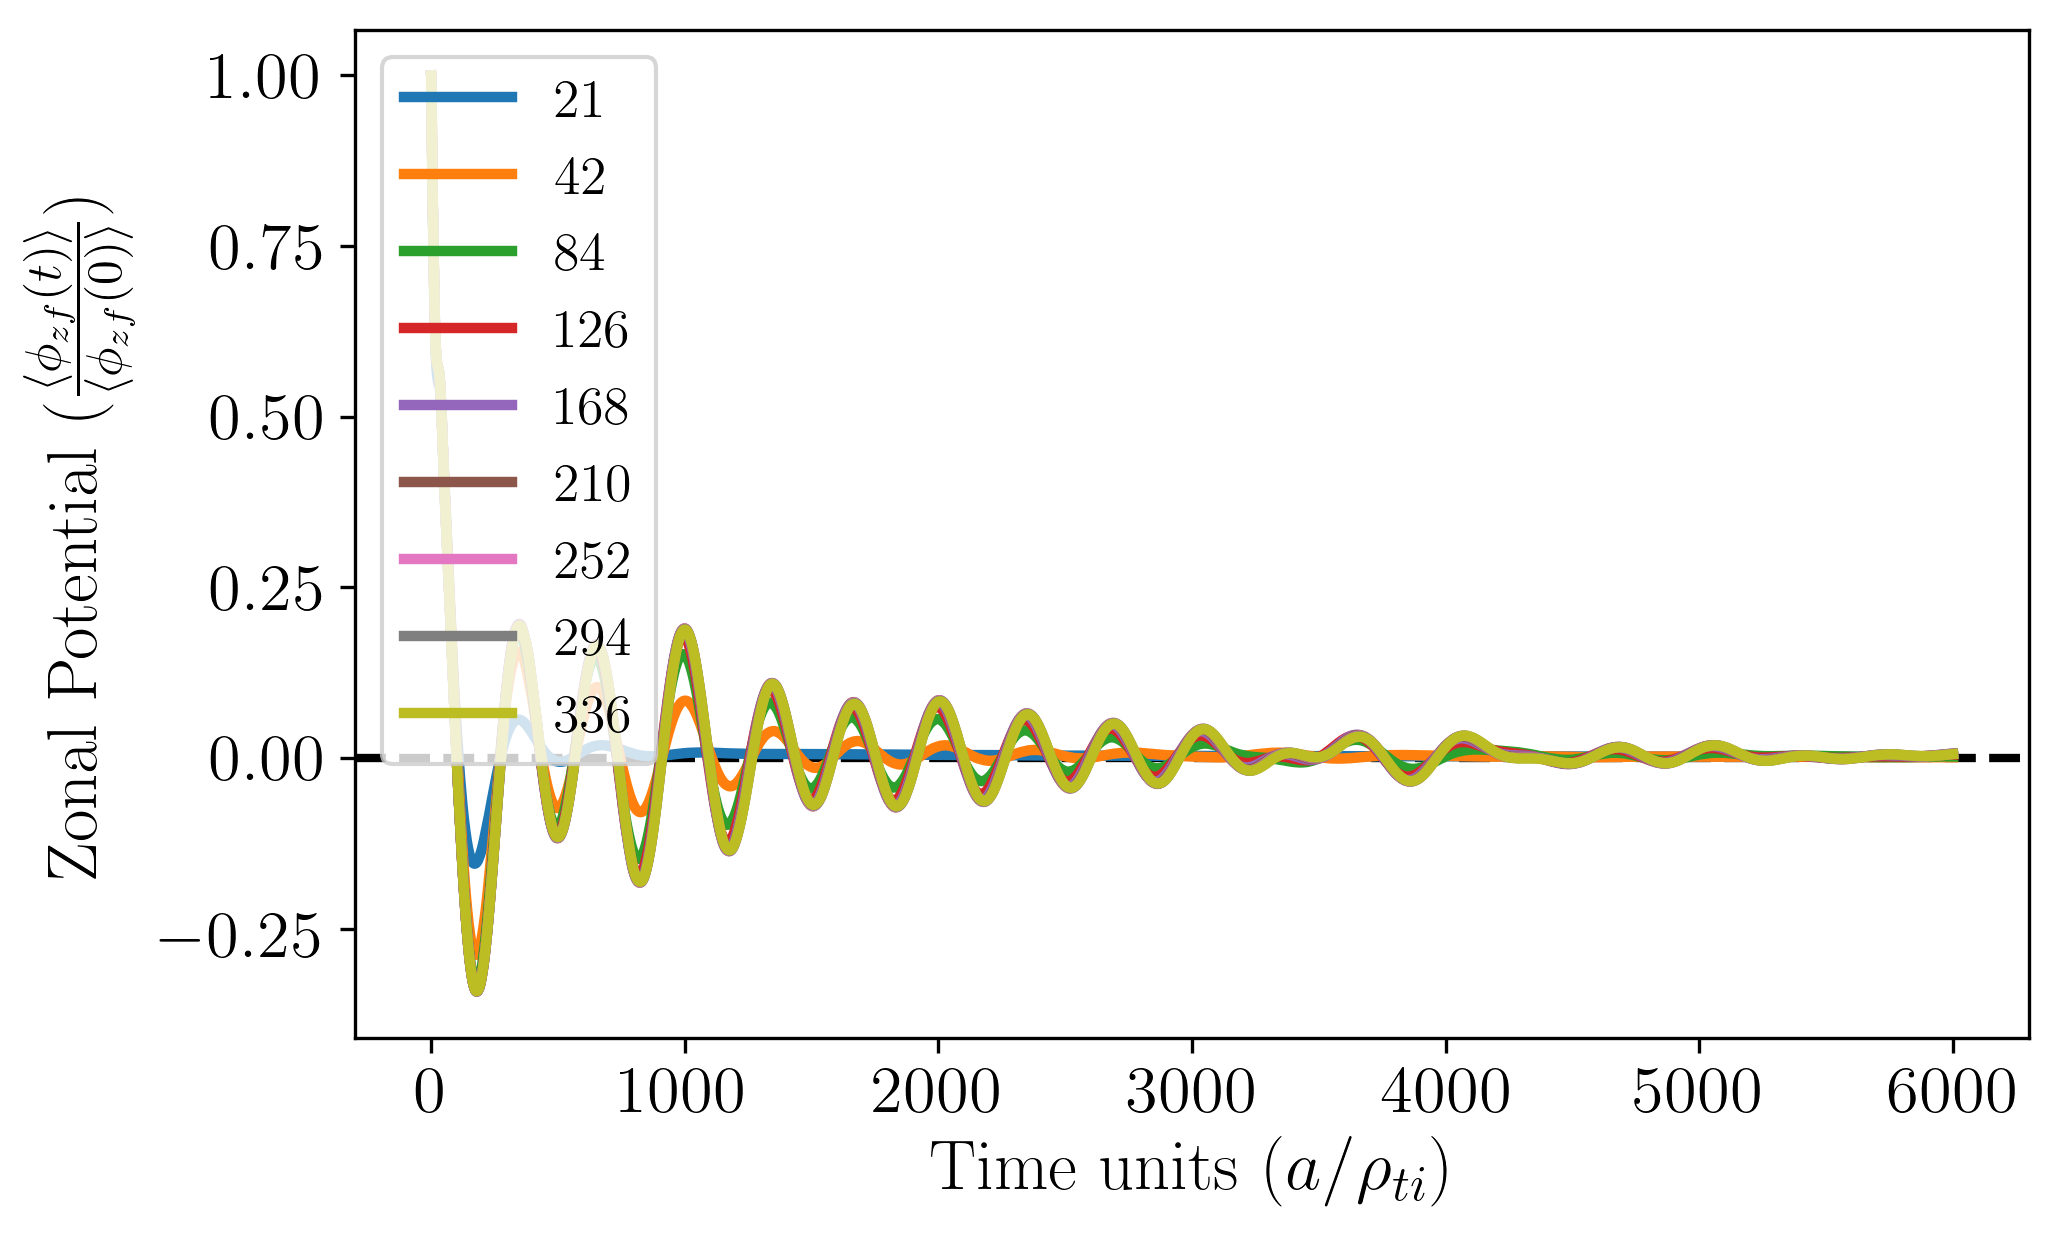

In [159]:
%cd /u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/nv0_surface_k=0.03/
t0 = 0
tf = 6000
scan = 21, 42, 84, 126, 168, 210, 252, 294, 336  # nv0
all_x, all_r, all_a, all_e = convergence_fitter(plot='kakakak')
scan_v2 = scan
res_v2 = all_a

/raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/nw0_surface_k=0.03


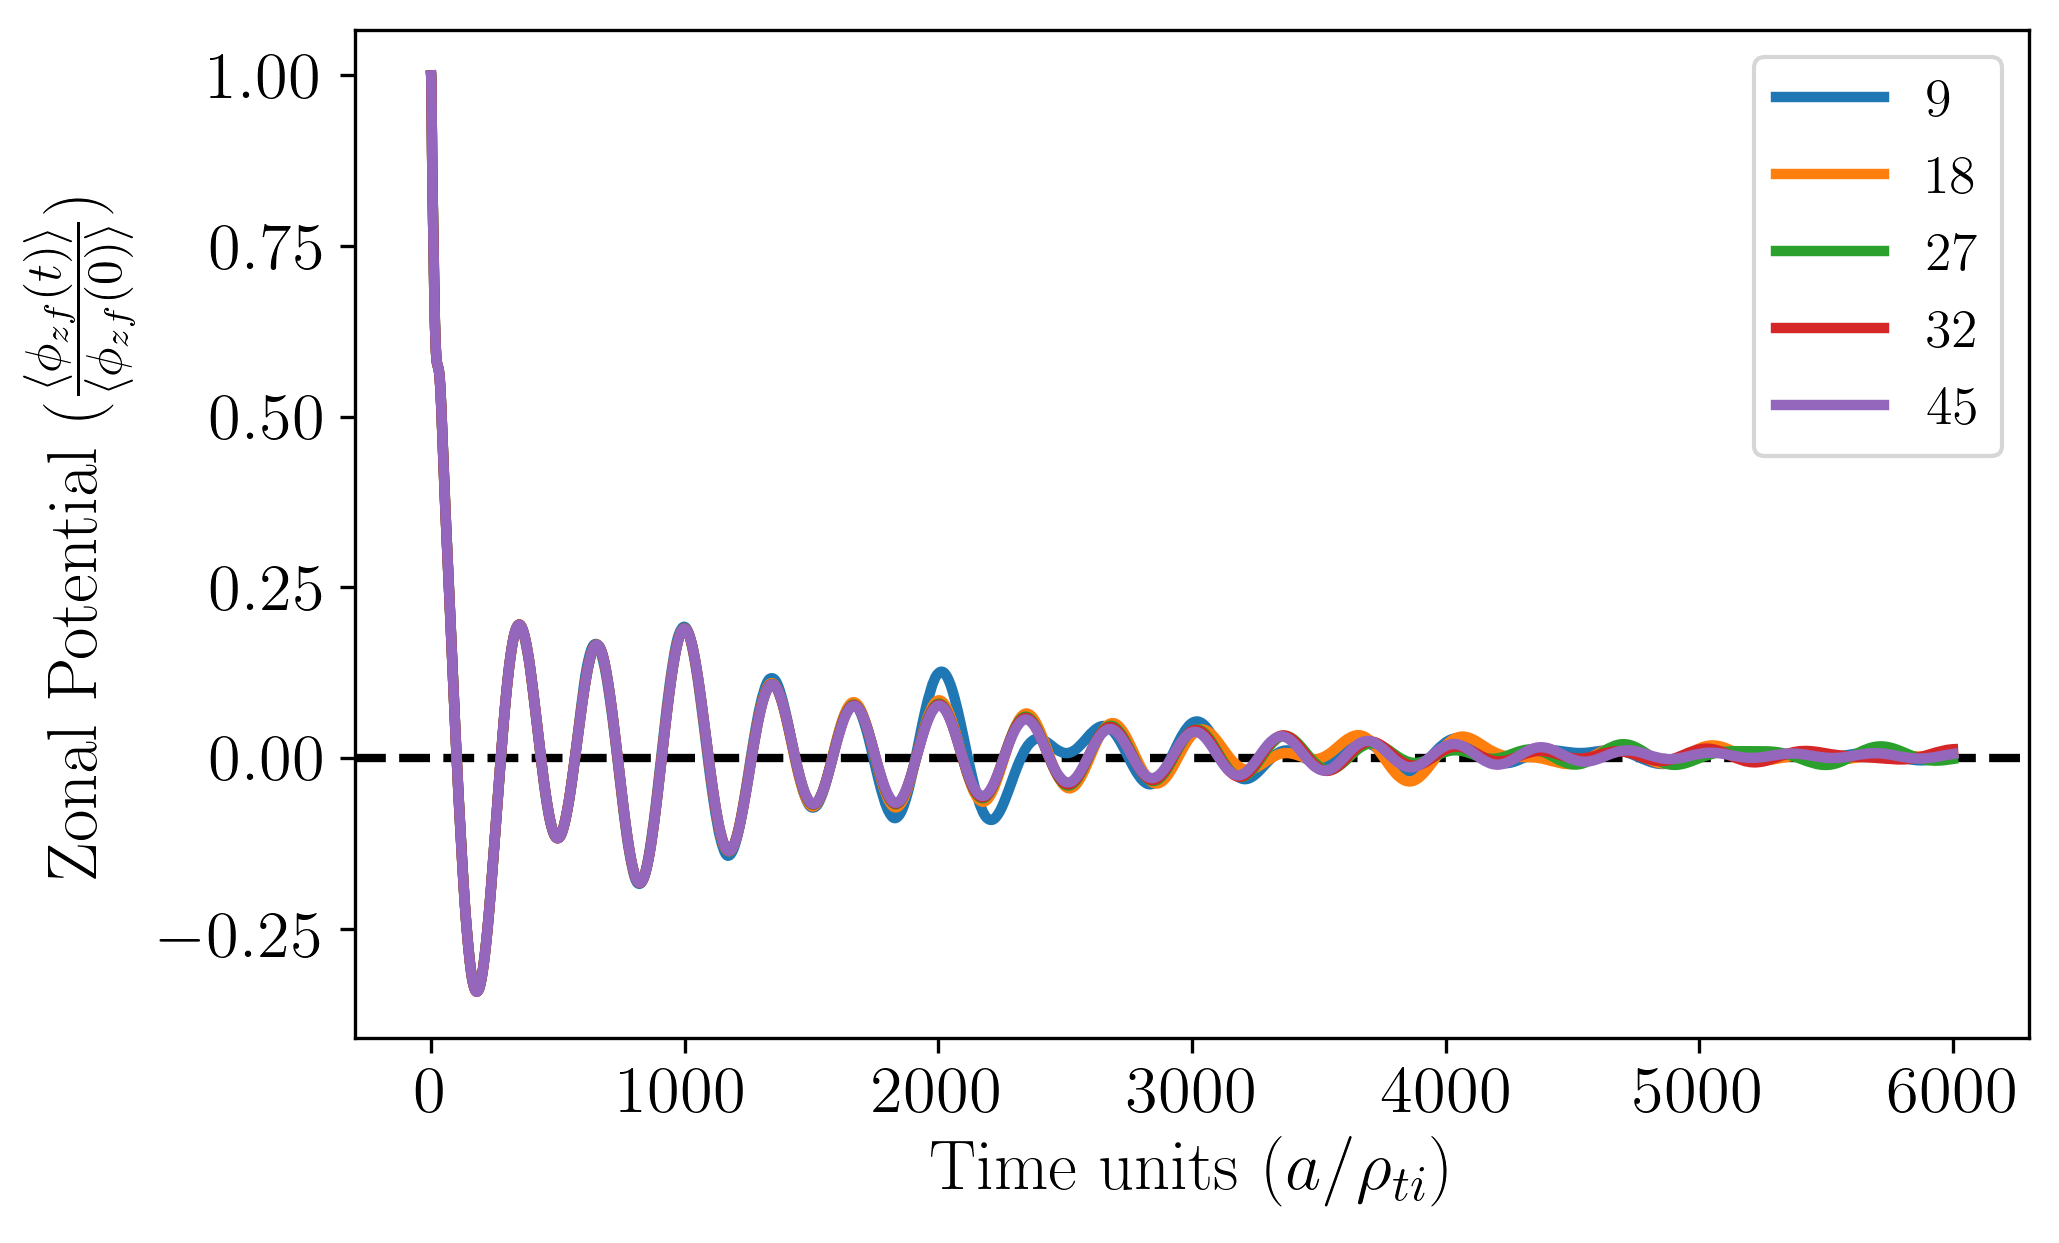

In [160]:
%cd /u/cmor/jupyter/HP_project/data/w7x_kjm30/convergence/nw0_surface_k=0.03
t0 = 0
tf = 6000
scan = 9, 18, 27, 32, 45  # nw0
all_x, all_r, all_a, all_e = convergence_fitter(plot='kakakak')
scan_w = scan
res_w = all_a

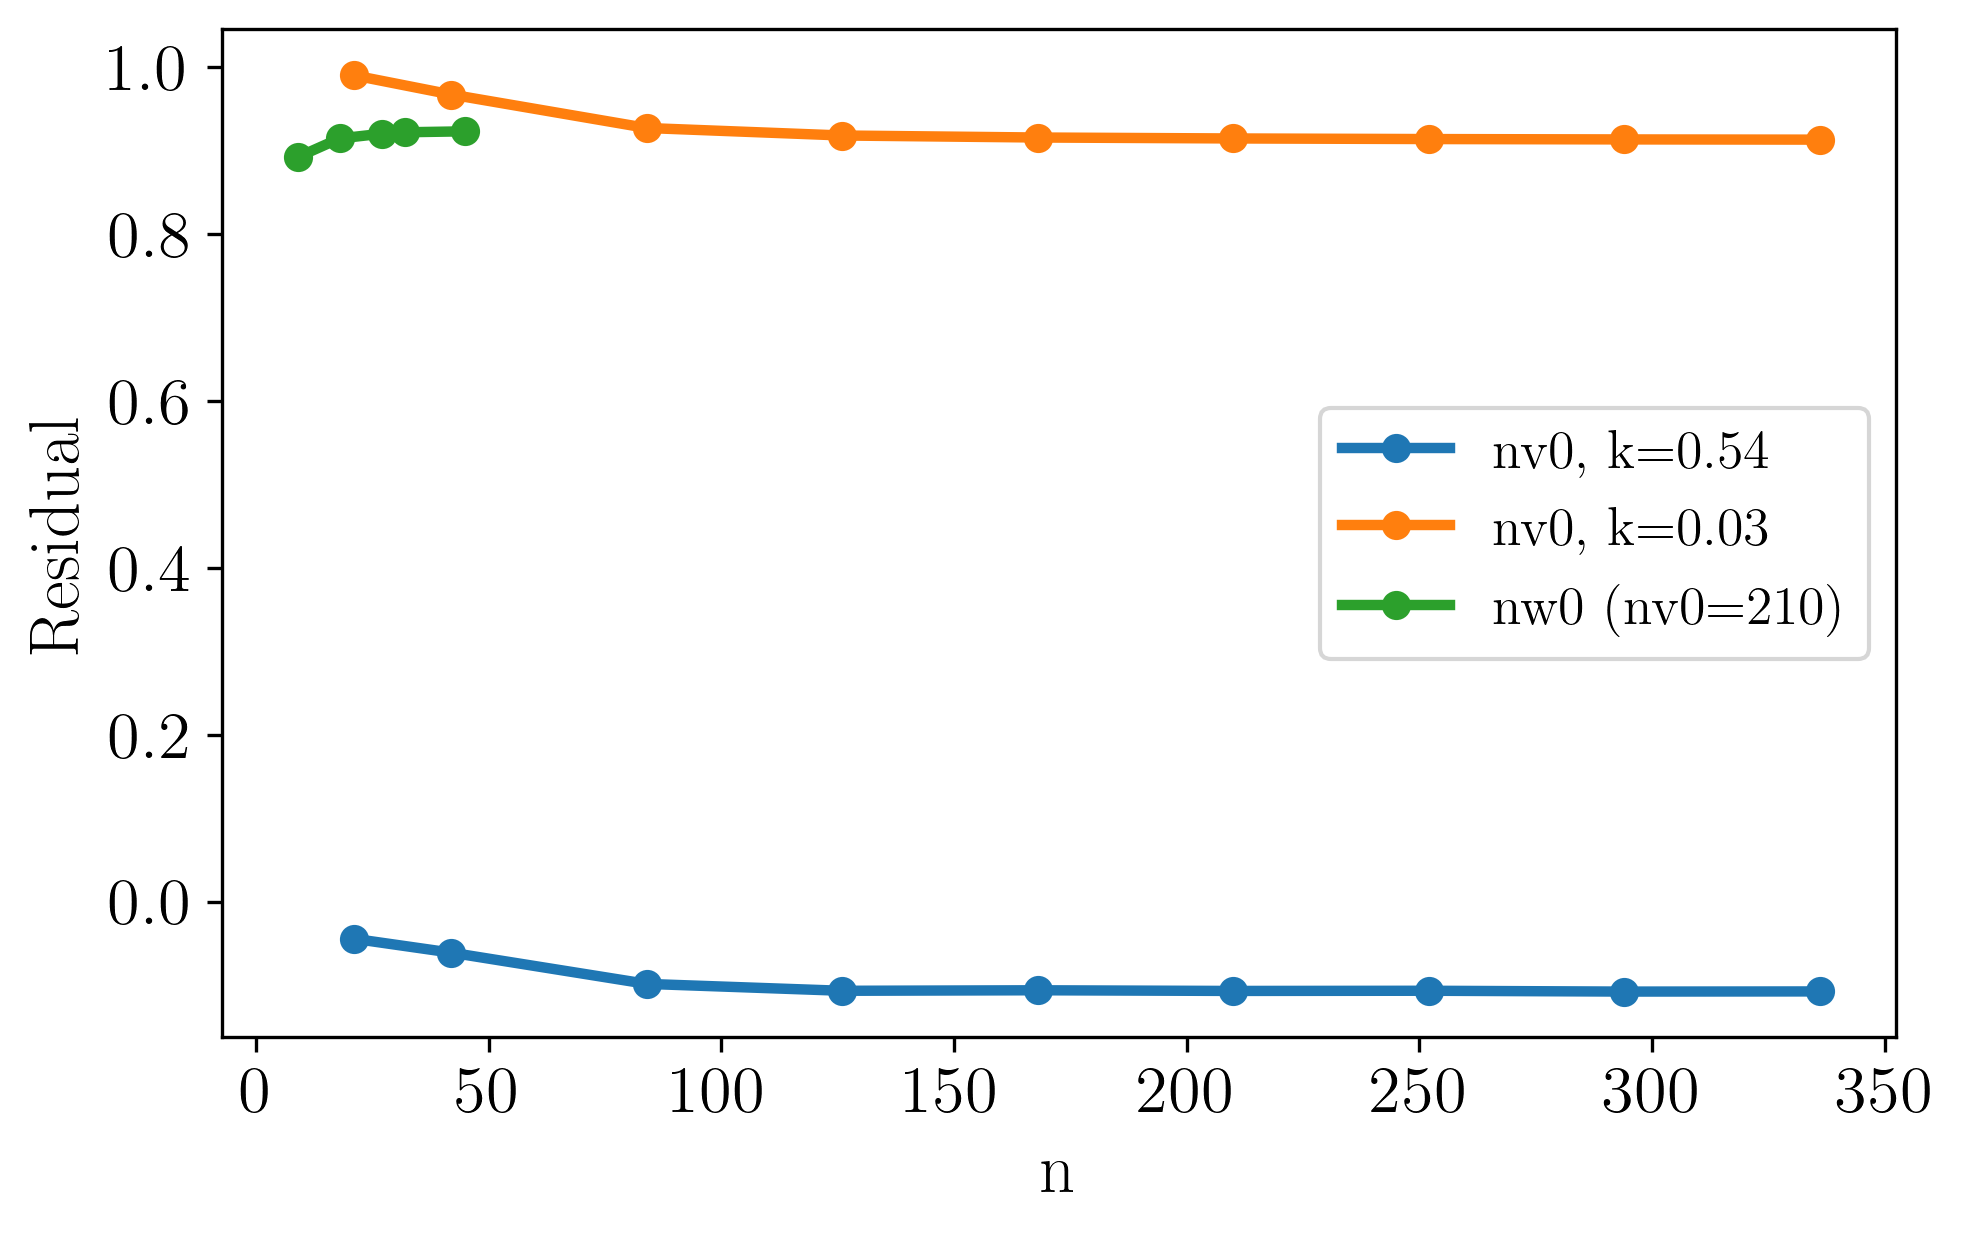

In [167]:
plt.figure()
plt.plot(scan_v, res_v, '-o', label=r"nv0, k=0.54")
plt.plot(scan_v2, res_v2, '-o', label=r"nv0, k=0.03")
# plt.plot(scan_v[4], res_v[4], 'rX')
plt.plot(scan_w, res_w, '-o', label=r"nw0 (nv0=210)")
# plt.plot(scan_w[2], res_w[2], 'rX')
# plt.plot(scan_gl, res_gl, label=r"n0global (nv0=144, nw0=14)")
# plt.plot(scan_gl[0], res_gl[0], 'rX')
plt.xlabel(r"n")
plt.ylabel(r"Residual")
plt.legend()
plt.show()